In [5]:
%run '../00_rh_settings.ipynb'
%run '../00_rh_load_interim.ipynb'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [6]:
df_describe = pd.DataFrame()

In [7]:
df_describe["dtypes"] = df.dtypes

In [8]:
df_describe["NaN_count"] = df.apply(lambda x: x.isna().sum())

In [9]:
df_describe["Unique_count"] = df.apply(lambda x: x.nunique())

# Check missed and unique

In [10]:
df_describe

,dtypes,NaN_count,Unique_count
Unnamed: 0,int64,0,4157
loanKey,int64,0,4157
rep_loan_date,datetime64[ns],0,582
first_loan,datetime64[ns],0,634
dpd_5_cnt,float64,3482,8
dpd_15_cnt,float64,3482,6
dpd_30_cnt,float64,3482,4
first_overdue_date,datetime64[ns],3482,78
close_loans_cnt,float64,15,21
federal_district_nm,object,11,8


## Column types

In [11]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,10
1,datetime64[ns],3
2,bool,1
3,float64,8
4,object,1


# TODO

|   |   |
|---|---|
|1. Fill na for dpd |Done: fix_dpd()|
|2. past_billings_cnt|Done in: fix_past_billings_cnt()|
|3. score1 & score2|#TODO make imputation, now fill with zeros  |

federal_district_nm, close_loans_cnt passed because of small number of samples

/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


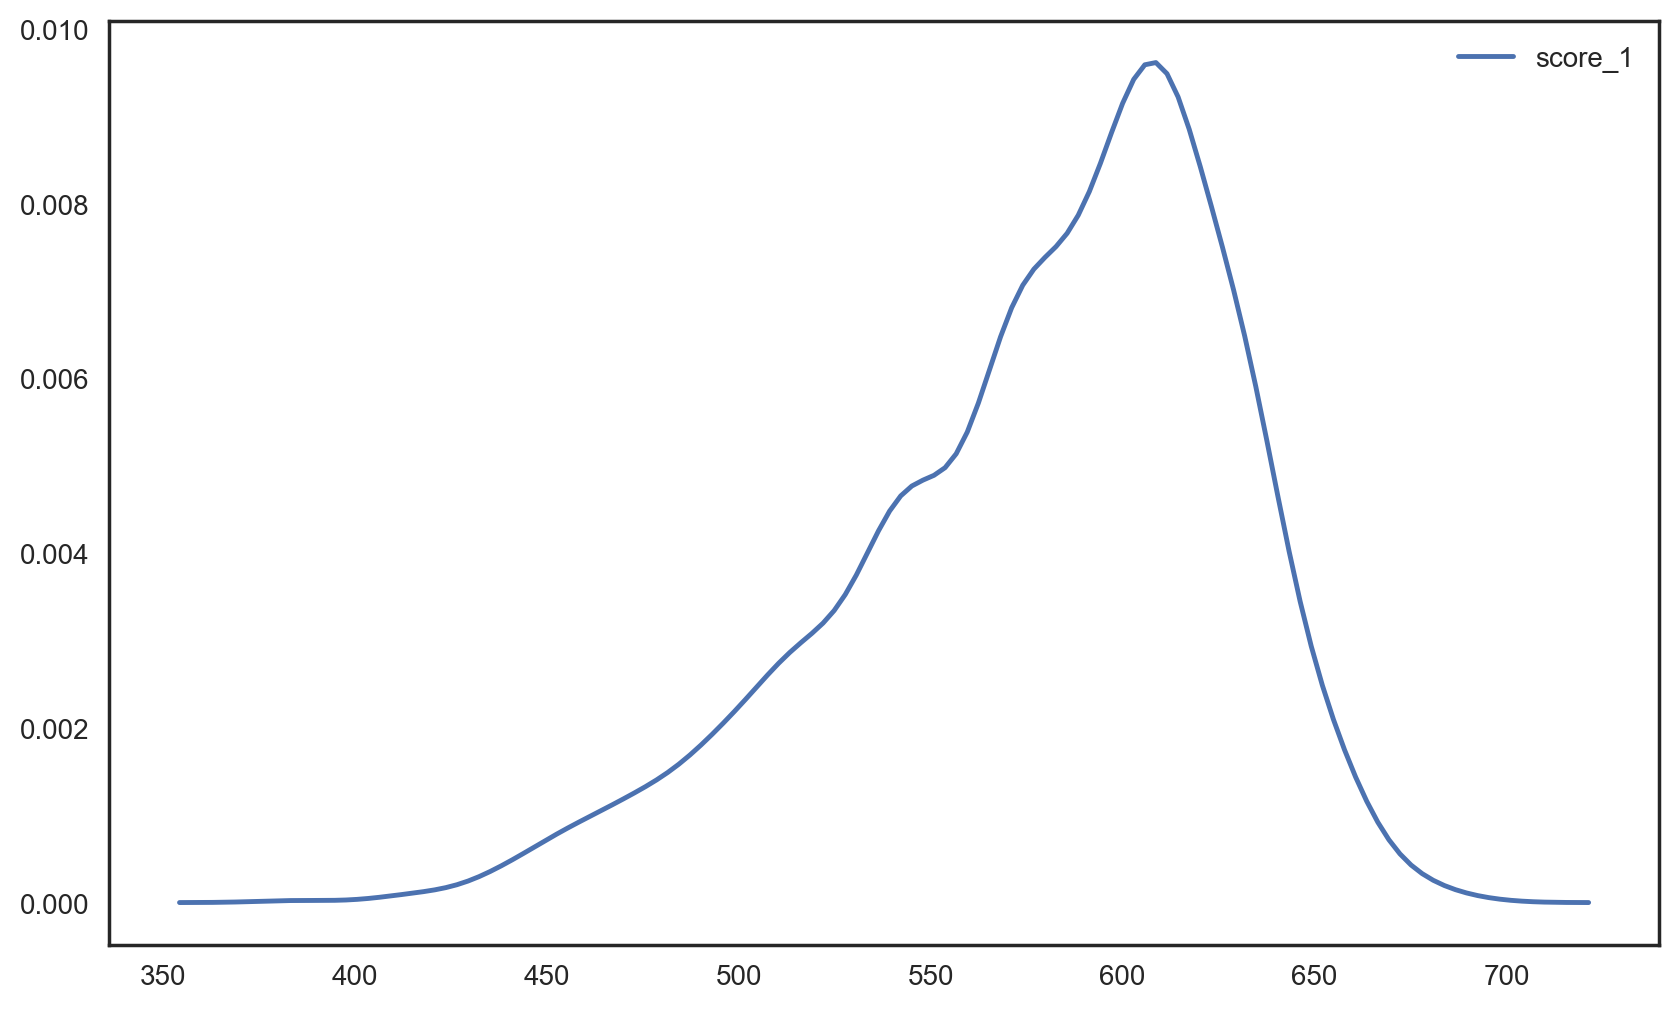

In [12]:
sns.kdeplot(df["score_1"])

/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


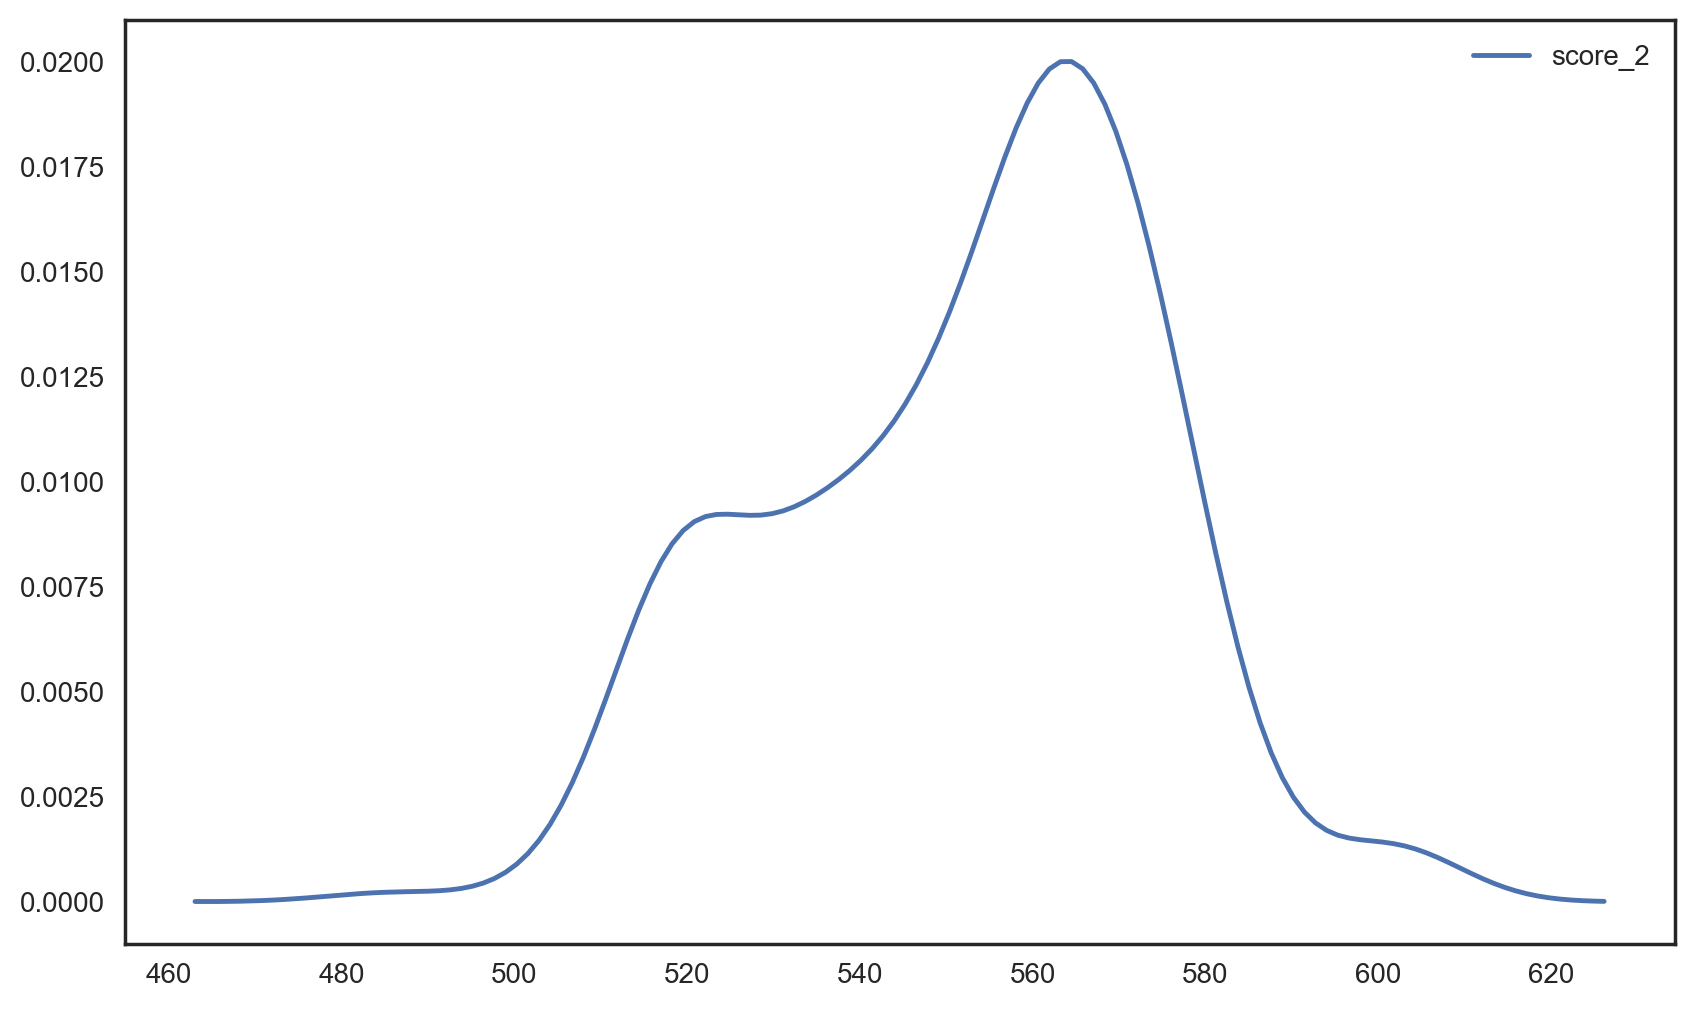

In [13]:
sns.kdeplot(df["score_2"])

In [14]:
train_df['days_from_2015'] = (train_df['date1'] - pd.Timestamp('2015-01-01')).dt.days
train_df = train_df.drop('date1', axis=1)

test_df['days_from_2015'] = (test_df['date1'] - pd.Timestamp('2015-01-01')).dt.days
test_df = test_df.drop('date1', axis=1)

NameError: name 'train_df' is not defined

In [15]:
df.dtypes == np.dtype('datetime64[ns]')

Unnamed: 0             False
loanKey                False
rep_loan_date           True
first_loan              True
dpd_5_cnt              False
dpd_15_cnt             False
dpd_30_cnt             False
first_overdue_date      True
close_loans_cnt        False
federal_district_nm    False
TraderKey              False
payment_type_0         False
payment_type_1         False
payment_type_2         False
payment_type_3         False
payment_type_4         False
payment_type_5         False
past_billings_cnt      False
score_1                False
score_2                False
age                    False
gender                 False
bad_flag               False
dtype: bool

In [16]:
for col in df.select_dtypes(include=np.dtype('datetime64[ns]')).columns:
    df[col] = (df[col] - pd.Timestamp('2015-01-01')).dt.days
    #df = df.drop(col, axis=1)

In [17]:
df

,Unnamed: 0,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,0,708382,644,316,NaN,NaN,NaN,NaN,3.0,region_6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,1,406305,450,270,1.0,0.0,0.0,394.0,0.0,region_6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,2,779736,668,354,NaN,NaN,NaN,NaN,2.0,region_1,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,3,556376,545,180,NaN,NaN,NaN,NaN,1.0,region_6,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,4,266968,334,214,NaN,NaN,NaN,NaN,0.0,region_5,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0
5,5,697186,639,241,NaN,NaN,NaN,NaN,2.0,region_3,...,6,0,0,0,5.0,NaN,NaN,34.0,False,0
6,6,347907,413,157,1.0,0.0,0.0,309.0,2.0,region_3,...,9,0,0,0,8.0,NaN,NaN,32.0,False,0
7,7,256097,326,154,1.0,1.0,0.0,309.0,0.0,region_3,...,5,0,0,0,5.0,NaN,NaN,23.0,False,1
8,8,670540,627,336,3.0,1.0,0.0,379.0,1.0,region_2,...,4,0,0,0,6.0,NaN,NaN,33.0,False,0
9,9,254453,325,154,1.0,1.0,0.0,309.0,0.0,region_3,...,5,0,0,0,5.0,NaN,NaN,23.0,False,1


In [27]:
def generate_dates(df):
	import itertools
	cols = ["rep_loan_date","first_loan","first_overdue_date"]
    features = pd.DataFrame({'{}{}'.format(a, b): df[a] - df[b] for a, b in itertools.combinations(cols, 2)})
	return pd.concat([df,features])

IndentationError: unindent does not match any outer indentation level (<ipython-input-27-ffe8dd4609ab>, line 4)

In [28]:
generate_dates(df)

,TraderKey,Unnamed: 0,age,bad_flag,close_loans_cnt,dpd_15_cnt,dpd_30_cnt,dpd_5_cnt,federal_district_nm,first_loan,...,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,rep_loan_date,rep_loan_datefirst_loan,rep_loan_datefirst_overdue_date,score_1,score_2
0,6.0,0.0,21.0,0.0,3.0,NaN,NaN,NaN,region_6,316.0,...,0.0,10.0,0.0,0.0,0.0,644.0,NaN,NaN,NaN,NaN
1,6.0,1.0,20.0,0.0,0.0,0.0,0.0,1.0,region_6,270.0,...,0.0,6.0,0.0,0.0,0.0,450.0,NaN,NaN,NaN,NaN
2,6.0,2.0,19.0,0.0,2.0,NaN,NaN,NaN,region_1,354.0,...,0.0,0.0,5.0,0.0,0.0,668.0,NaN,NaN,NaN,NaN
3,14.0,3.0,21.0,0.0,1.0,NaN,NaN,NaN,region_6,180.0,...,0.0,4.0,0.0,0.0,0.0,545.0,NaN,NaN,NaN,NaN
4,22.0,4.0,33.0,0.0,0.0,NaN,NaN,NaN,region_5,214.0,...,3.0,0.0,0.0,0.0,0.0,334.0,NaN,NaN,NaN,NaN
5,38.0,5.0,34.0,0.0,2.0,NaN,NaN,NaN,region_3,241.0,...,0.0,6.0,0.0,0.0,0.0,639.0,NaN,NaN,NaN,NaN
6,6.0,6.0,32.0,0.0,2.0,0.0,0.0,1.0,region_3,157.0,...,0.0,9.0,0.0,0.0,0.0,413.0,NaN,NaN,NaN,NaN
7,6.0,7.0,23.0,1.0,0.0,1.0,0.0,1.0,region_3,154.0,...,0.0,5.0,0.0,0.0,0.0,326.0,NaN,NaN,NaN,NaN
8,6.0,8.0,33.0,0.0,1.0,1.0,0.0,3.0,region_2,336.0,...,0.0,4.0,0.0,0.0,0.0,627.0,NaN,NaN,NaN,NaN
9,6.0,9.0,23.0,1.0,0.0,1.0,0.0,1.0,region_3,154.0,...,0.0,5.0,0.0,0.0,0.0,325.0,NaN,NaN,NaN,NaN
